In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

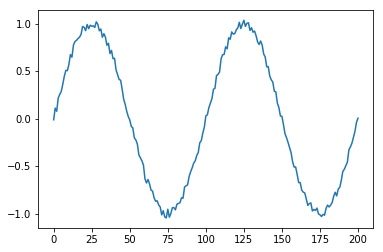

In [53]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

T = 100
x = np.arange(0, 2 * T + 1)
f = toy_problem(T)
plt.plot(x,y)
plt.show()

In [54]:
length_of_sequences = 2 * T
maxlen = 25

data = []
target = []
for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

In [55]:
X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

In [56]:
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_varidation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [57]:
def inference(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)
    
    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.contrib.rnn.BasicRNNCell(n_hidden)
    initial_state = cell.zero_state(n_batch, tf.float32)
    
    state = initial_state
    outputs = []
    with tf.variable_scope('RNN'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)
            
    output = outputs[-1]
    
    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c
    
    return y

In [58]:
def loss(y, t):
    mse = tf.reduce_sum(tf.square(y - t))
    return mse

In [59]:
def training(loss):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)
    
    train_step = optimizer.minimize(loss)
    return trainz_step

In [60]:
n_in = len(X[0][0])
n_hidden = 20
n_out = len(Y[0])

x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
n_batch = tf.placeholder(tf.int32)

y = inference(x, 10, maxlen=maxlen, n_hidden=n_hidden, n_out=n_out)
loss = loss(y, t)
train_step = train_step(loss)

ValueError: Variable RNN/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-39-f80e8683ad1a>", line 19, in inference
    (cell_output, state) = cell(x[:, t, :], state)
  File "<ipython-input-43-3fba2f12e77c>", line 9, in <module>
    y = inference(x, 10, maxlen=maxlen, n_hidden=n_hidden, n_out=n_out)
  File "/Users/satoshi/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
